# Outcomes
By the end of this notebook you will be able to..
* Create a vector field in Python
* Create a 3D vector in Python
* Visualize data in 3D using Plotly

In the previous module, we learned how to create an array of vectors and visualize them using the `quiver` function. We can use the `quiver` fucntion to model vector fields similar to the ones discussed in class. To do this we will need to load our favorite libraries.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, lets create a set of data points in both the $x$ and $y$ directions to combine them together to create a grid of points to plot our vectors to. 

In [ ]:
x,y = np.meshgrid(np.linspace(-5,5,20),np.linspace(-5,5,20))


In [ ]:
u = x; v = y

fig = plt.figure() 
ax = fig.subplots()
q = ax.quiver(x,y,u,v)

plt.show()

In [ ]:
u = x; v = y

fig = plt.figure() 
ax = fig.subplots()
q = ax.quiver(x[::3],y[::3],u[::3],v[::3])

plt.show()

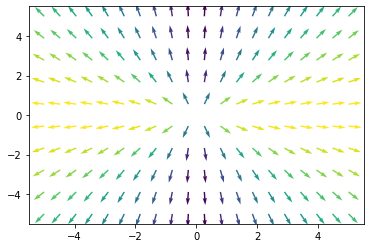

In [57]:
X= np.linspace(-5,5,20)
Y= np.linspace(-5,5,10)
X,Y= np.meshgrid(X, Y)
k = 9E9
pointcharge = {'q':1,'x':0,'y':0}


def E(xfeild,yfeild):
    q = pointcharge['q']
    xcharge = pointcharge['x']
    ycharge = pointcharge['y']
    r = np.sqrt((xfeild-xcharge)**2 + (yfeild-ycharge)**2)
    return (xfeild/r,yfeild/r)

def E_dir(x,y):
    #direction field
    Ex,Ey=E(x,y)
    n= np.sqrt(Ex**2+Ey**2)
    return [Ex/n, Ey/n]

Ex,Ey = E(X,Y)
Exdir,Eydir = E_dir(X,Y)
EE= np.sqrt(Ex**2+Ex**2)

fig = plt.figure() 
ax = fig.subplots()
Q  = ax.quiver(X,Y,Exdir,Eydir,EE,cmap='viridis')
plt.show()